# 삼각 그리드 생성

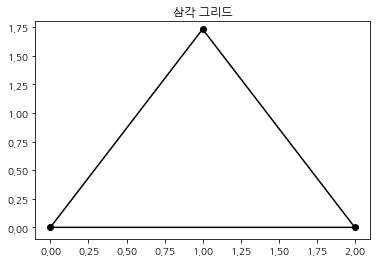

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# 한글
mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus = False)

x = np.array([0, 1, 2])
y = np.array([0, np.sqrt(3), 0])
triangles = [[0, 1, 2]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("삼각 그리드")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.show()

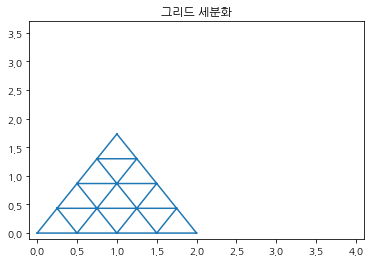

In [3]:
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv = 2)
plt.title("그리드 세분화")
plt.triplot(triang2)
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

# 그리드 플롯


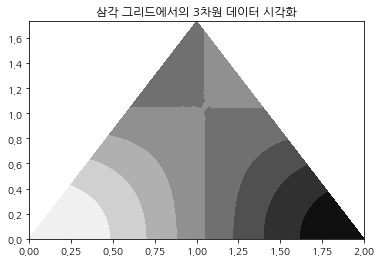

In [6]:
triang5  = refiner.refine_triangulation(subdiv = 5)
z5 = np. cos(1.5 * triang5.x)* np.cos(1.5 * triang5.y)
plt.title("삼각 그리드에서의 3차원 데이터 시각화")
plt.tricontourf(triang5, z5, cmap = "gray")
plt.show()

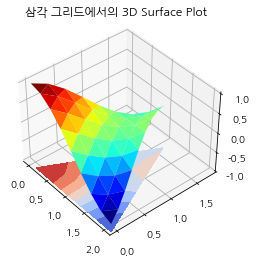

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

triang3 = refiner.refine_triangulation(subdiv = 3)
z3 = np.cos(1.5 * triang3.x) * np.cos(1.5 * triang3.y)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_title("삼각 그리드에서의 3D Surface Plot")
ax.plot_trisurf(triang3.x, triang3.y, z3, cmap = cm.jet, linewidth = 0.2)
ax.tricontourf(triang3, z3, zdir = 'z', offset = -1.2, cmap = cm.coolwarm)
ax.set_zlim(-1, 1)
ax.view_init(40, -40)
plt.show()